# Testing the Stationarity of a Signal

In [1]:
import SignalSnap as snp
import numpy as np

In [2]:
# ------- creat complex noise --------
t_array = np.arange(0, 1e6, 1) # in s
dt = t_array[1] - t_array[0]
f_max = 1 / dt / 2
print('f_Nyquist =', f_max, 'Hz')

white_noise_real = np.random.normal(size=len(t_array))
white_noise_imag = 1j * np.random.normal(size=len(t_array))

noise = white_noise_real + white_noise_imag

# ------- filter noise ---------
def dydt(y, t, omega_0, gamma, noise):
    return + 1j * omega_0[int(t)] * y - gamma * y + noise[int(t)] / 10

y0 = 0
omega_0 = 2 * np.pi * np.linspace(0.001, 0.004, len(t_array))
gamma = 0.001

# ------- integrate with euler method --------
y = 1j * np.empty_like(t_array)
y[0] = y0
for i in range(1, len(t_array)):
    y[i] = y[i-1] + dt * dydt(y[i-1], t_array[i-1], omega_0, gamma, noise)

f_Nyquist = 0.5 Hz


In [3]:
spec = snp.Spectrum(data=np.real(y), delta_t=dt, f_unit='Hz')

Actual T_window: 5000.0
Maximum frequency: 0.5
Number of points: 51


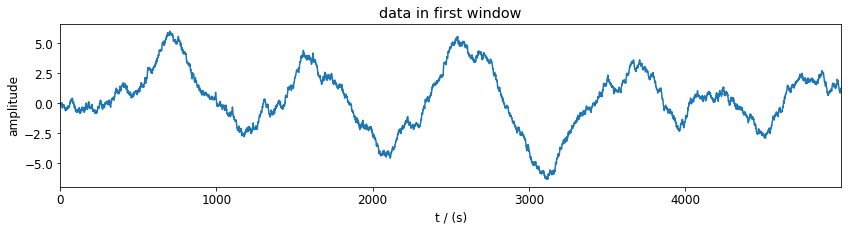

chunk shape:  5000


In [4]:
T_window = 0.5e4 # these are now ms since the unit of choice are kHz
f_max = 0.01 # kHz
f, s, serr = spec.calc_spec(order_in=[2,3,4], T_window=T_window, f_max=f_max, backend='cpu', m_stationarity=1)

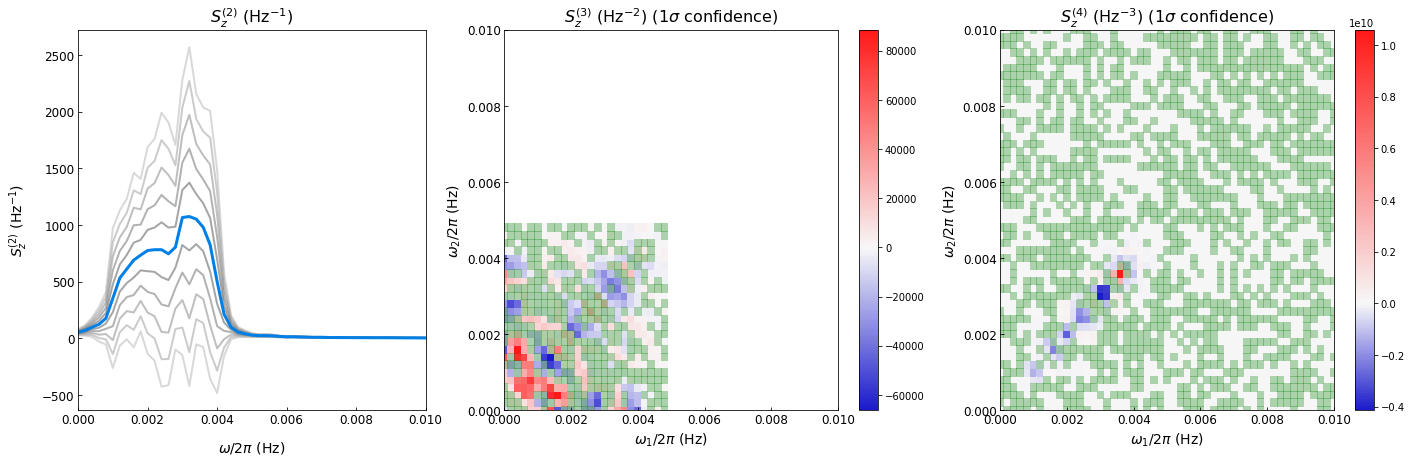

In [5]:
fig = spec.plot()

One spectrum calculated from a 50000.0 s measurement


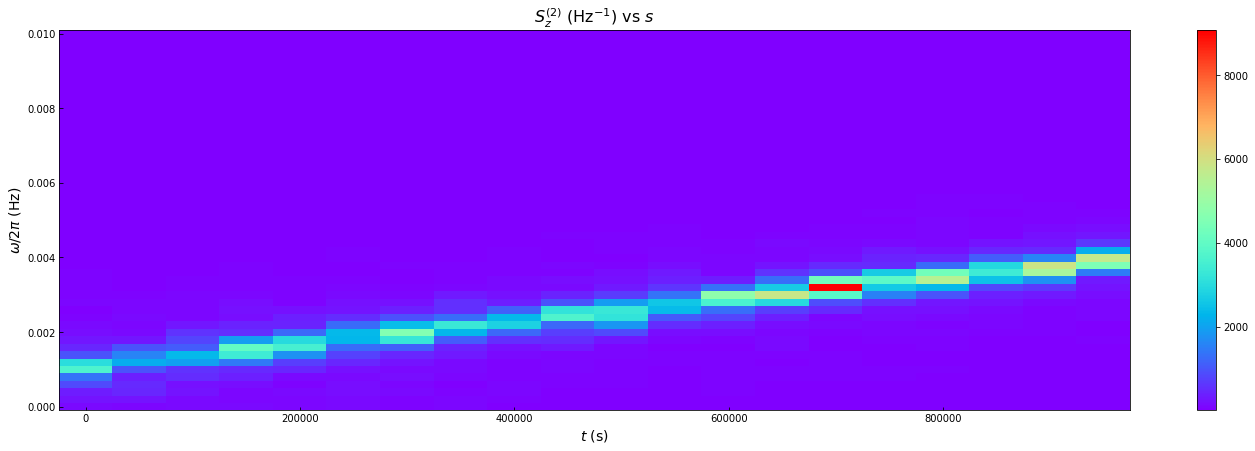

In [6]:
fig = spec.stationarity_plot()